In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 150)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Store 7 Model

In [6]:
df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/preprocessing_and_filtering/processed_data.csv')
df.drop(columns=['Unnamed: 0', 'Zip code', 'State', 'Completed Date', 'Latitude', 'Longitude'], inplace=True)
df = df.dropna()
df.head()

,Location ID,Tonnage,Days Since Last Pickup,Last Pickup Tonnage,Second Last Pickup Tonnage,Third Last Pickup Tonnage,Weekdays Since Last Pickup,Weekend Days Since Last Pickup,Days Before Last Pickup,Days Before Second Last Pickup,Days Before Third Last Pickup,Month
4,1,6.69,10.0,5.61,5.32,9.15,6.0,6.0,7.0,11.0,3.0,3
5,1,5.86,9.0,6.69,5.61,5.32,7.0,3.0,10.0,7.0,11.0,3
6,1,7.59,12.0,5.86,6.69,5.61,8.0,6.0,9.0,10.0,7.0,3
7,1,4.76,7.0,7.59,5.86,6.69,5.0,3.0,12.0,9.0,10.0,4
8,1,6.97,9.0,4.76,7.59,5.86,7.0,3.0,7.0,12.0,9.0,4


In [7]:
store_7 = df[df['Location ID'] == 7]
store_7.head()
store_7.shape

(108, 12)

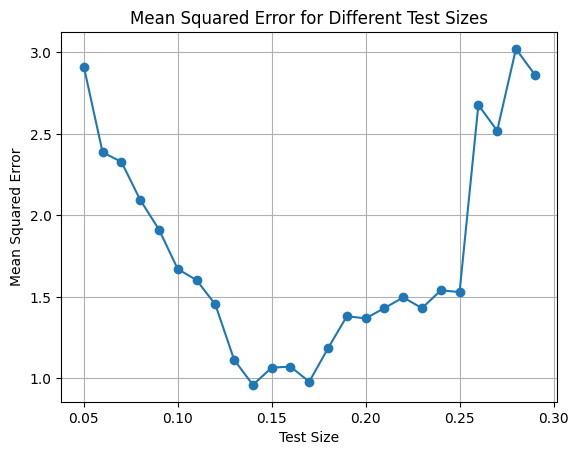

In [11]:
X = store_7.drop(columns=['Tonnage'])
y = store_7['Tonnage']

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

# testing to see which train/test split is optimal
test_sizes = []
mses = []

for i in range(5, 30):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_sizes.append(test_size)
    mses.append(mse)
    
# plotting train/test split vs mse
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()